In [1]:
import yt
import os
import H5
import SimulationIO as SIO
import numpy as np

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data Inspection

In [2]:
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/'+'cactus'
fname='unigrid-cell'
fname += '.s5'
print fname
fpath=source_dir+'/'+fname

unigrid-cell.s5


In [3]:
domain_left_edge = [-1.1,-1.1,-1.1]
domain_dds = [0.1,0.1,0.1]
nghosts = 1
ds = yt.load(fpath,ghost_zones = nghosts,
             domain_left_edge = domain_left_edge,
             domain_dds = domain_dds,
             configuration='iteration.0000000000-timelevel.0')

yt : [INFO     ] 2016-05-01 15:28:54,581 SimulationIO: Configuration "iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-05-01 15:28:54,583 SimulationIO: Discretization "iteration.0000000000-timelevel.0-level.00"
yt : [WARNING  ] 2016-05-01 15:28:54,585 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?
yt : [WARNING  ] 2016-05-01 15:28:54,586 Assuming all grids have same number of ghost zones.
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:492: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if active.valid() and self.ghost_zones != None:
yt : [WARNING  ] 2016-05-01 15:28:54,588 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?
/home/jmiller/.local/lib

In [4]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	          8000	            20
----------------------------------------------
   	     1	          8000


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 3.241e-24 Mpc
	Width: 3.241e-18 pc
	Width: 6.685e-13 AU
	Width: 1.000e+01 cm


In [5]:
for g in ds.index.grids:
    print g.LeftEdge,g.RightEdge,g.dds,(g.stop_index - g.start_index)

[-1. -1. -1.] code_length [ 1.  1.  1.] code_length [ 0.1  0.1  0.1] code_length [ 20.  20.  20.] dimensionless


In [6]:
print ds.domain_width

[ 2.  2.  2.] code_length


In [7]:
ds.domain_left_edge

YTArray([-1., -1., -1.]) code_length

In [8]:
print ds.index.grid_left_edge
print ds.index.grid_right_edge

[[-1. -1. -1.]] code_length
[[ 1.  1.  1.]] code_length


In [9]:
g = ds.index.grids[0]

In [10]:
sp = ds.sphere([0.0, 0.0, 0.0], (0.25, 'm'))

In [11]:
print sp

YTSphere (unigrid-cell.s5): , center=[ 0.  0.  0.] m, radius=0.25 m


In [12]:
print sp.quantities.keys()

['SpinParameter', 'MinLocation', 'WeightedVariance', 'TotalMass', 'AngularMomentumVector', 'WeightedAverageQuantity', 'SampleAtMaxFieldValues', 'TotalQuantity', 'CenterOfMass', 'BulkVelocity', 'Extrema', 'MaxLocation', 'SampleAtMinFieldValues']


In [13]:
print sp.quantities.total_quantity('ones')

56.0 dimensionless


In [14]:
print sp.quantities.extrema('GRID::r')

yt : [INFO     ] 2016-05-01 15:28:55,086 SimulationIO: Reading field "GRID::r"


fieldcomponentname = GRID::r
fieldname = GRID::r
componentname = None


yt : [WARNING  ] 2016-05-01 15:28:55,091 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/io.py:114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.ds.ghost_zones != None:


[ 0.08660254  0.21794495] dimensionless


In [15]:
print sp.quantities.total_quantity('GRID::x')

yt : [INFO     ] 2016-05-01 15:28:55,120 SimulationIO: Reading field "GRID::x"


fieldcomponentname = GRID::x
fieldname = GRID::x
componentname = None


yt : [WARNING  ] 2016-05-01 15:28:55,123 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?


1.33226762955e-15 dimensionless


In [16]:
ds.domain_left_edge

YTArray([-1., -1., -1.]) code_length

In [17]:
for g in ds.index.grids:
    print g.Level,g.start_index,g.stop_index,g.ActiveDimensions

0 [0 0 0] dimensionless [20 20 20] dimensionless [20 20 20]


In [18]:
ds.domain_dimensions

array([ 20.,  20.,  20.])

## Simple Visualization

yt : [INFO     ] 2016-05-01 15:28:55,235 SimulationIO: Reading field "GRID::r"


fieldcomponentname = GRID::r
fieldname = GRID::r
componentname = None


yt : [WARNING  ] 2016-05-01 15:28:55,240 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?
yt : [INFO     ] 2016-05-01 15:28:55,247 Projection completed
yt : [INFO     ] 2016-05-01 15:28:55,248 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-01 15:28:55,249 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-01 15:28:55,252 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-01 15:28:55,253 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-01 15:28:55,256 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800



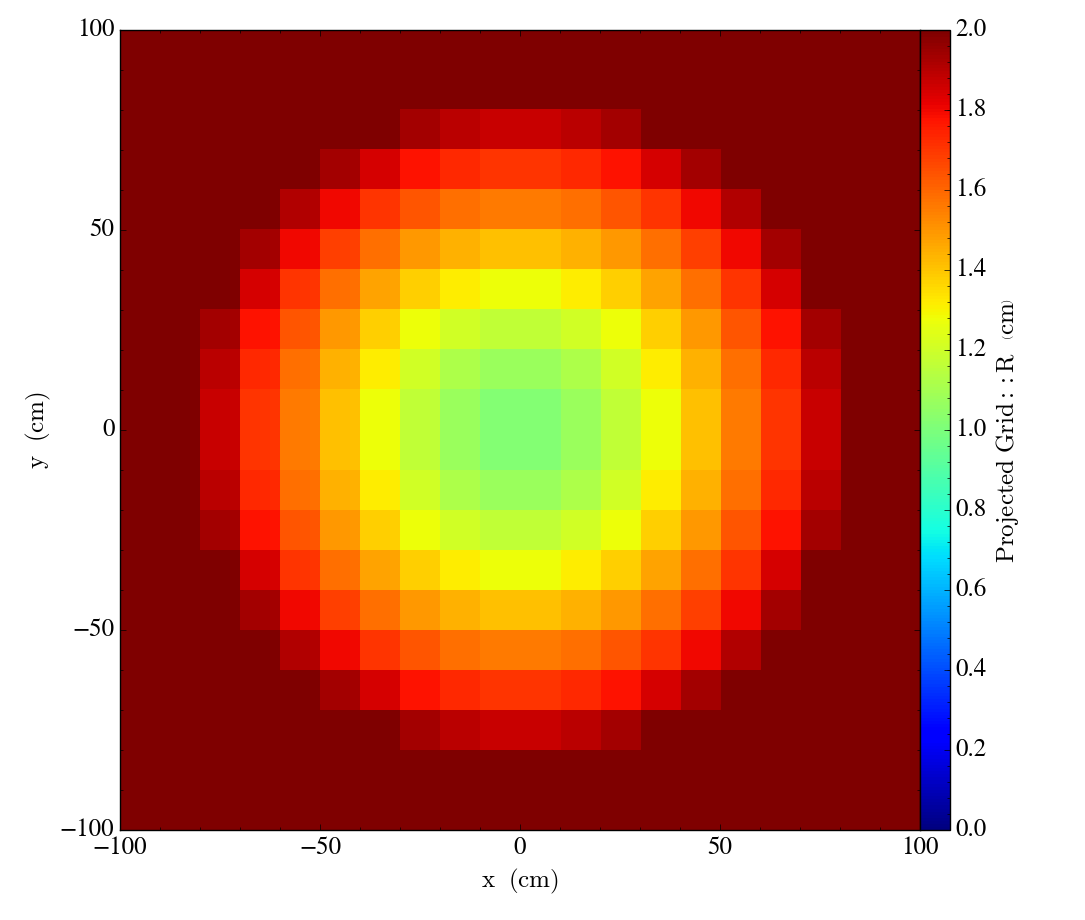

In [19]:
p = yt.ProjectionPlot(ds, "z", "GRID::r")
#p.set_figure_size(2)
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
p.set_zlim("all", 0, 2)
p.show()

yt : [INFO     ] 2016-05-01 15:28:56,190 Creating default volume
yt : [INFO     ] 2016-05-01 15:28:56,193 SimulationIO: Reading field "GRID::r"


fieldcomponentname = GRID::r
fieldname = GRID::r
componentname = None


yt : [WARNING  ] 2016-05-01 15:28:56,197 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?
yt : [INFO     ] 2016-05-01 15:28:56,200 Creating default transfer function
yt : [INFO     ] 2016-05-01 15:28:56,201 Calculating data bounds. This may take a while.  Set the .bounds to avoid this.
yt : [INFO     ] 2016-05-01 15:28:56,203 SimulationIO: Reading field "GRID::r"


fieldcomponentname = GRID::r
fieldname = GRID::r
componentname = None


yt : [WARNING  ] 2016-05-01 15:28:56,206 Ghost zones defined both by SIO active region and ghost zones parameter. This will override active region in file. Are you sure that's what you want?
yt : [INFO     ] 2016-05-01 15:28:56,215 Rendering scene (Can take a while).
yt : [INFO     ] 2016-05-01 15:28:56,956 Saving render unigrid-cell.s5_Render_GRID::r.png


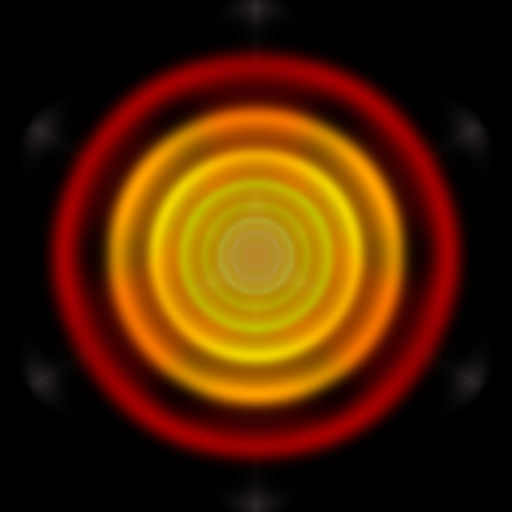

In [20]:
im, sc = yt.volume_render(ds,'GRID::r')
sc.show()